Load File

In [1]:
import pandas as pd
import datetime as dt
from datetime import timedelta
import datetime as datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read the entire file with ~ 700K records
df1 = pd.read_csv('C:\\Users\\Varun\\Desktop\\2009_2016_ODOT.csv', low_memory=False)

In [3]:
#Filter out incidents with fatalities
df2 = df1.copy()
# df2 = df2[(df2.Fatality == "Y")]
df2 = df2.reset_index()

In [4]:
df2 = df2.rename(columns ={'Number of Fatalities in Unit':'Total_Fatalities'})
df2 = df2.rename(columns ={'Phone Present':'Phone_Present'})
df2 = df2.rename(columns ={'Vehicle Year':'Vehicle_Year'})
df2 = df2.rename(columns ={'Doc ID':'Doc_ID'})

In [5]:
count1 = len(df2.Date)

-*-

-*-
Correct date format

In [6]:
def f1_date(date):
    s1 = str(date)
    fmt1 ='%m/%d/%Y'
    date = datetime.datetime.strptime(s1, fmt1)
    return date

In [7]:
for i in range (count1):
    df2.set_value(i, 'Date', f1_date(df2.Date[i]))

C:\Users\Varun\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


-*-
Add month and year columns to pandas dataframe

In [8]:
df3 = df2.copy()
df3 = df3.sort_values(by='Date')

In [9]:
#df2["Week_year"] = ""
df3["Month_year"] = ""
df3["Year"] = ""

In [10]:
for i in range (count1):
    df3.set_value(i, 'Month_year', df3.Date[i].strftime('%Y-%m'))
    df3.set_value(i, 'Year', df3.Date[i].year)

C:\Users\Varun\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Varun\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
df3 = df3.rename(columns ={'Alcohol Involved':'Alcohol_Involved'})
df3 = df3.rename(columns ={'Drugs Involved':'Drugs_Involved'})

In [12]:
df3 = df3.reset_index()

In [13]:
for i in range (count1):
    if df3.Alcohol_Involved[i] == "Y":
        df3.set_value(i, 'Alcohol_Involved', 1)
    elif df3.Alcohol_Involved[i] == "N":
        df3.set_value(i, 'Alcohol_Involved', 0)

C:\Users\Varun\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Varun\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


In [14]:
for i in range (count1):
    if df3.Drugs_Involved[i] == "Y":
        df3.set_value(i, 'Drugs_Involved', 1)
    elif df3.Drugs_Involved[i] == "N":
        df3.set_value(i, 'Drugs_Involved', 0)

C:\Users\Varun\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
C:\Users\Varun\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
for i in range (count1):
    if df3.Phone_Present[i] == "Y":
        df3.set_value(i, 'Phone_Present', 1)
    elif df3.Phone_Present[i] == "N":
        df3.set_value(i, 'Phone_Present', 0)

C:\Users\Varun\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
C:\Users\Varun\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


-*-

-*-

-*-
All vehicle year dates before 2010 can be set as 2010

In [16]:
df4 = df3.copy()  #one with dropped duplicates of Doc_ID
df4["Incidents_number"] = ""

for i in range (count1):
    if datetime.datetime(2010, 1, 1, 0, 0) < df4.Date[i] < datetime.datetime(2010, 12, 31, 0, 0):
        df4.set_value(i, 'Vehicle_Year', "2010")
    elif df4.Date[i] > datetime.datetime(2010, 12, 31, 0, 0):
        df4.set_value(i, 'Vehicle_Year', df4.Date[i].strftime('%Y'))

In [17]:
for i in range (count1):
    df4.set_value(i, 'Incidents_number', "1")

C:\Users\Varun\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [18]:
df5 = df4.copy().reset_index(drop=True)
df6 = df4.copy().reset_index(drop=True)
df7 = df4.copy().reset_index(drop=True)

df4 = df4.drop_duplicates("Doc_ID", keep=False)
df4 = df4.reset_index(drop=True)

-*-
Total Crashes


In [19]:
g1 = df4.groupby(["Month_year"]).count()

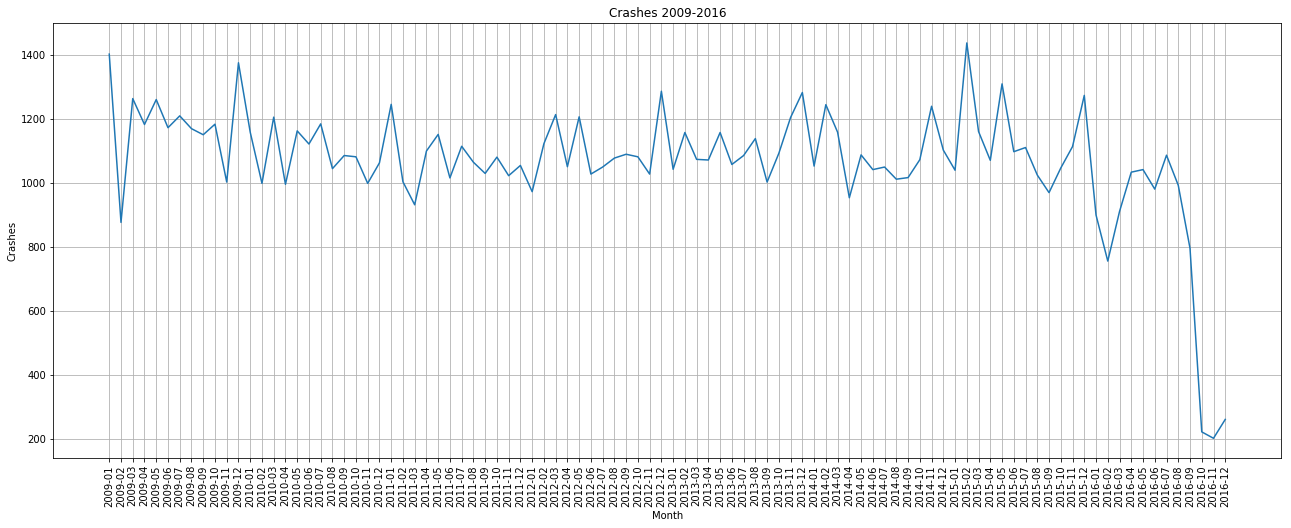

In [20]:
plt.figure(figsize = (22, 8))
plt.plot(g1.Incidents_number)
plt.xticks(rotation='vertical')
plt.title("Crashes 2009-2016")
plt.xlabel("Month")
plt.ylabel("Crashes")
plt.xticks
plt.grid()

-*-
Alcohol Involved

In [21]:
df5 = df5.drop_duplicates("Doc_ID", keep=False)
df5 = df5[(df5.Alcohol_Involved == 1)]

In [22]:
g2 = df5.groupby(["Month_year"]).count()

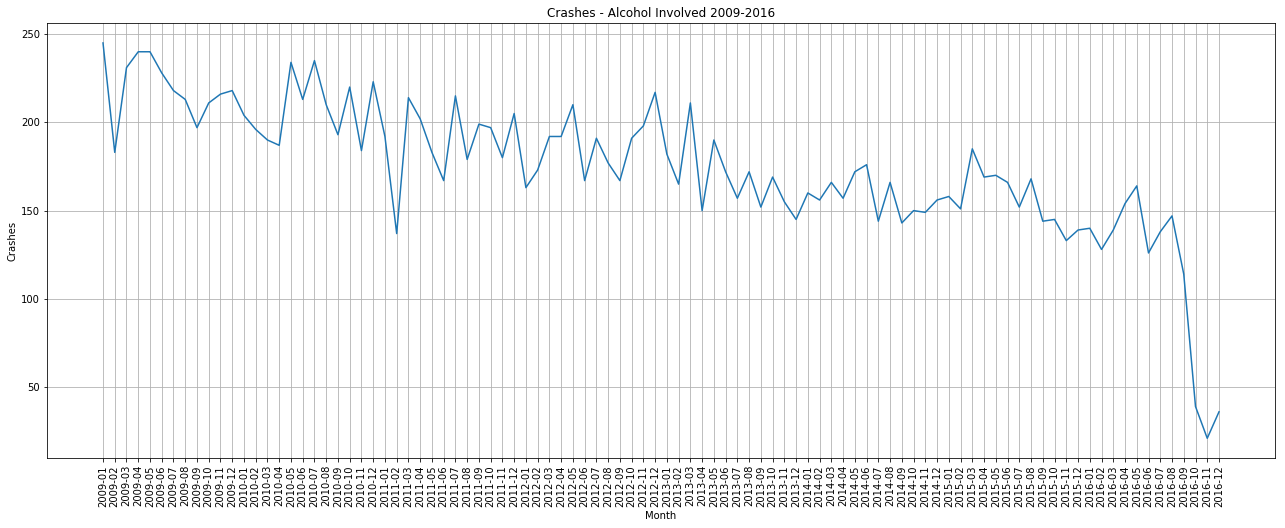

In [23]:
plt.figure(figsize = (22, 8))
plt.plot(g2.Alcohol_Involved)
plt.xticks(rotation='vertical')
plt.title("Crashes - Alcohol Involved 2009-2016")
plt.xlabel("Month")
plt.ylabel("Crashes")
plt.xticks
plt.grid()

-*-
Drugs Involved

In [24]:
df6 = df6.drop_duplicates("Doc_ID", keep=False)
df6 = df6[(df6.Drugs_Involved == 1)]

In [25]:
g3 = df6.groupby(["Month_year"]).count()

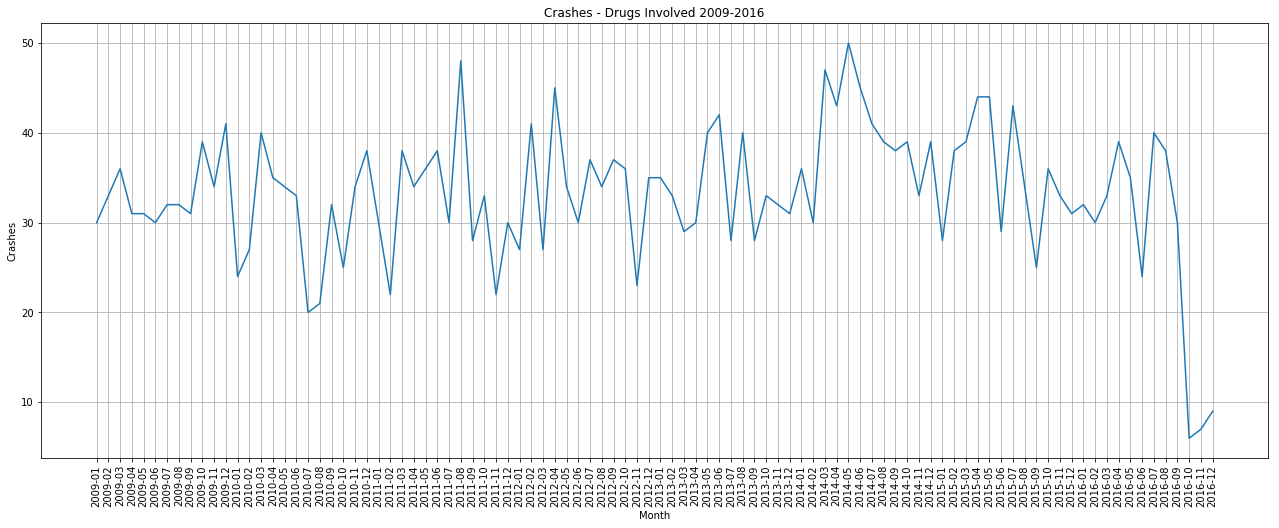

In [26]:
plt.figure(figsize = (22, 8))
plt.plot(g3.Drugs_Involved)
plt.xticks(rotation='vertical')
plt.title("Crashes - Drugs Involved 2009-2016")
plt.xlabel("Month")
plt.ylabel("Crashes")
plt.xticks
plt.grid()

-*-
Phone Present

In [27]:
df7 = df7.drop_duplicates("Doc_ID", keep=False)
df7 = df7[(df7.Phone_Present == 1)]

In [28]:
g4 = df7.groupby(["Month_year"]).count()

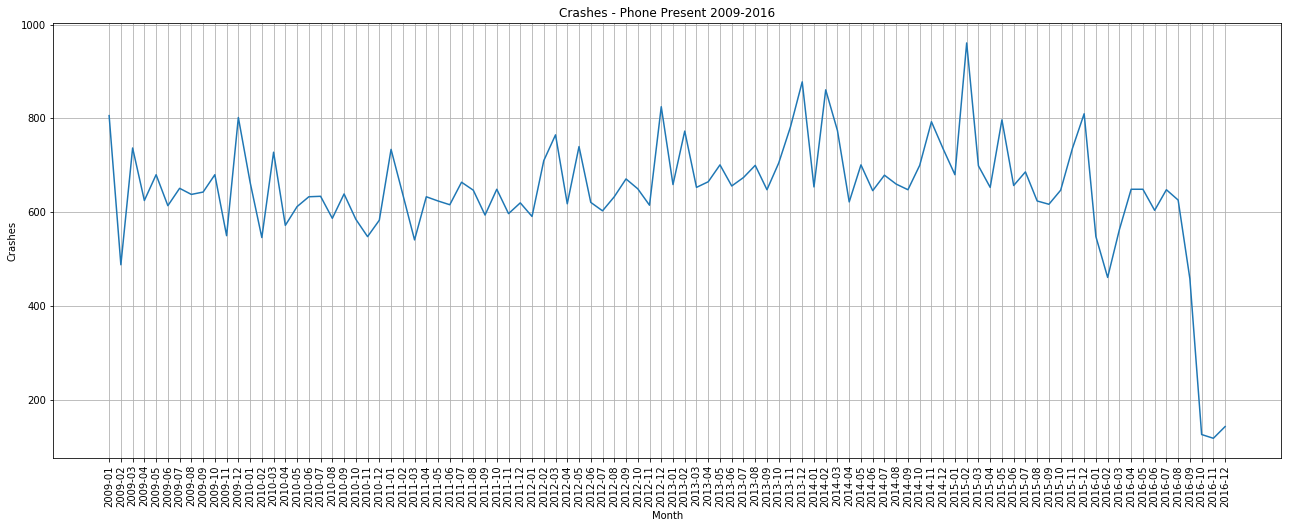

In [29]:
plt.figure(figsize = (22, 8))
plt.plot(g4.Phone_Present)
plt.xticks(rotation='vertical')
plt.title("Crashes - Phone Present 2009-2016")
plt.xlabel("Month")
plt.ylabel("Crashes")
plt.xticks
plt.grid()

-*-
-*-
-*-

In [30]:
df8 = df4.copy()
# df8 = df8.drop_duplicates("Doc_ID", keep=False).reset_index()
count4 = len(df8)

-*-
-*-
_Separate vehicles pre and post  2005_

In [31]:
df8 = df8[df8.Vehicle_Year != '9']
df8 = df8[df8.Vehicle_Year != '0']
df8 = df8[df8.Vehicle_Year != '']

df9 = df8.copy()
df9 = df9.drop_duplicates("Doc_ID", keep=False)

In [39]:
df9 = df8[df8.Vehicle_Year > '2006']
df10 = df8[df8.Vehicle_Year < '2006']

In [44]:
df19 = df9.copy().reset_index(drop=True)
df29 = df9.copy().reset_index(drop=True)
df39 = df9.copy().reset_index(drop=True)

In [45]:
df110 = df10.copy().reset_index(drop=True)
df210 = df10.copy().reset_index(drop=True)
df310 = df10.copy().reset_index(drop=True)

-*-
-*-
### ___Total Crashes - pre 2006___

In [54]:
gg1 = df10.groupby(["Month_year"]).count()

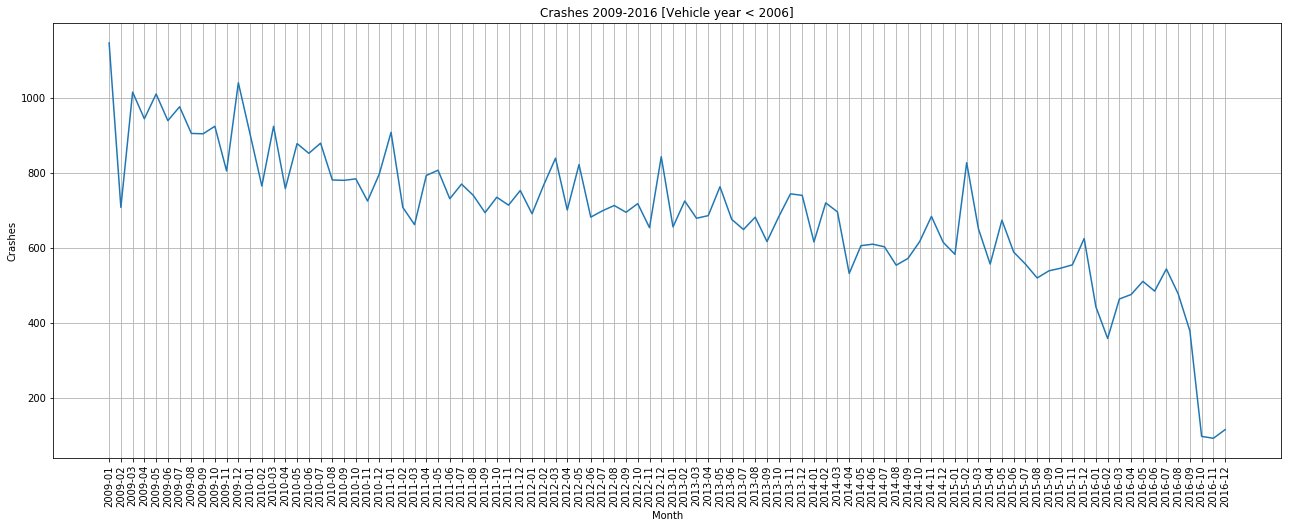

In [57]:
plt.figure(figsize = (22, 8))
plt.plot(gg1.Incidents_number)
plt.xticks(rotation='vertical')
plt.title("Crashes 2009-2016 [Vehicle year < 2006]")
plt.xlabel("Month")
plt.ylabel("Crashes")
plt.xticks
plt.grid()

-*-
Alcohol Involved

In [58]:
df110 = df110.drop_duplicates("Doc_ID", keep=False)
df110 = df110[(df110.Alcohol_Involved == 1)]

In [59]:
gg2 = df110.groupby(["Month_year"]).count()

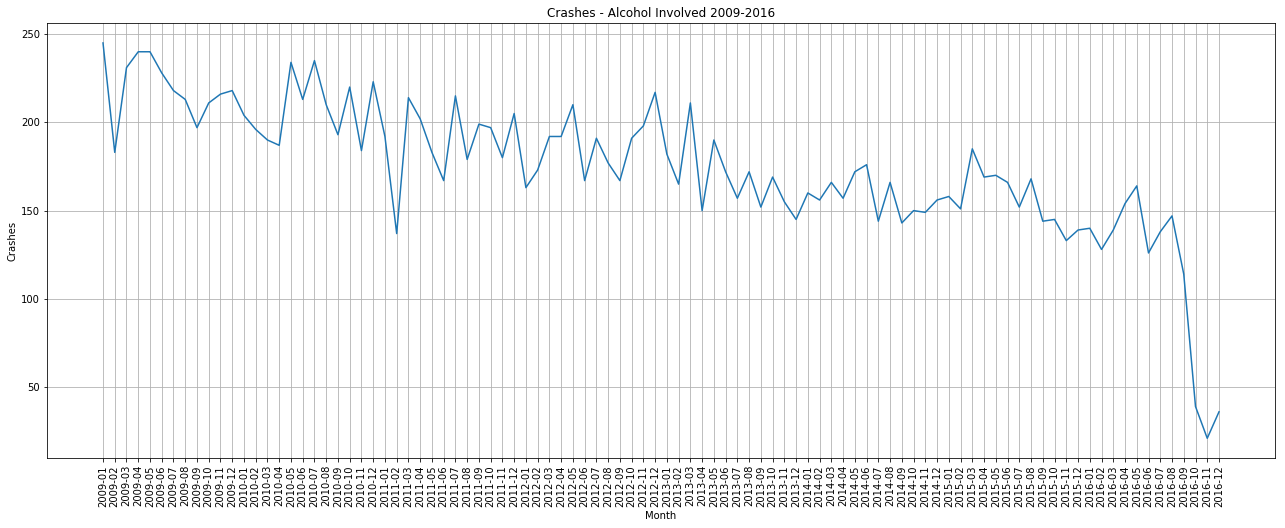

In [60]:
plt.figure(figsize = (22, 8))
plt.plot(g2.Alcohol_Involved)
plt.xticks(rotation='vertical')
plt.title("Crashes - Alcohol Involved 2009-2016")
plt.xlabel("Month")
plt.ylabel("Crashes")
plt.xticks
plt.grid()

-*-
Drugs Involved

In [61]:
df210 = df210.drop_duplicates("Doc_ID", keep=False)
df210 = df210[(df210.Drugs_Involved == 1)]

In [62]:
gg3 = df210.groupby(["Month_year"]).count()

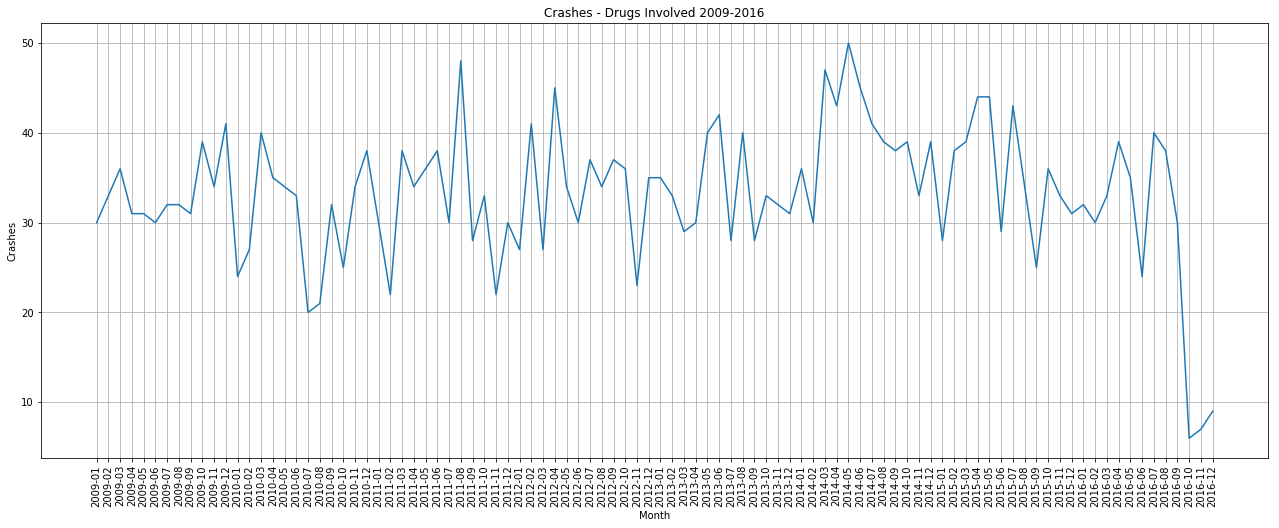

In [63]:
plt.figure(figsize = (22, 8))
plt.plot(g3.Drugs_Involved)
plt.xticks(rotation='vertical')
plt.title("Crashes - Drugs Involved 2009-2016")
plt.xlabel("Month")
plt.ylabel("Crashes")
plt.xticks
plt.grid()

-*-
Phone Present


In [64]:
df310 = df310.drop_duplicates("Doc_ID", keep=False)
df310 = df310[(df310.Phone_Present == 1)]

In [65]:
gg4 = df310.groupby(["Month_year"]).count()

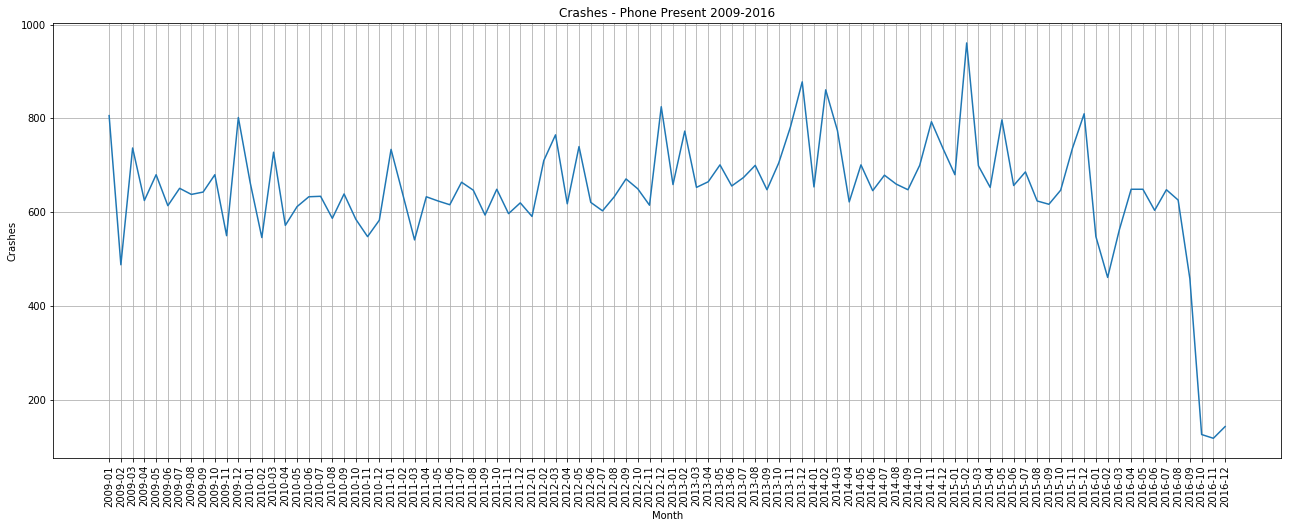

In [66]:
plt.figure(figsize = (22, 8))
plt.plot(g4.Phone_Present)
plt.xticks(rotation='vertical')
plt.title("Crashes - Phone Present 2009-2016")
plt.xlabel("Month")
plt.ylabel("Crashes")
plt.xticks
plt.grid()

-*-
-*-
### ___Total Crashes - post 2006___

In [78]:
fg1 = df9.groupby(["Month_year"]).count()

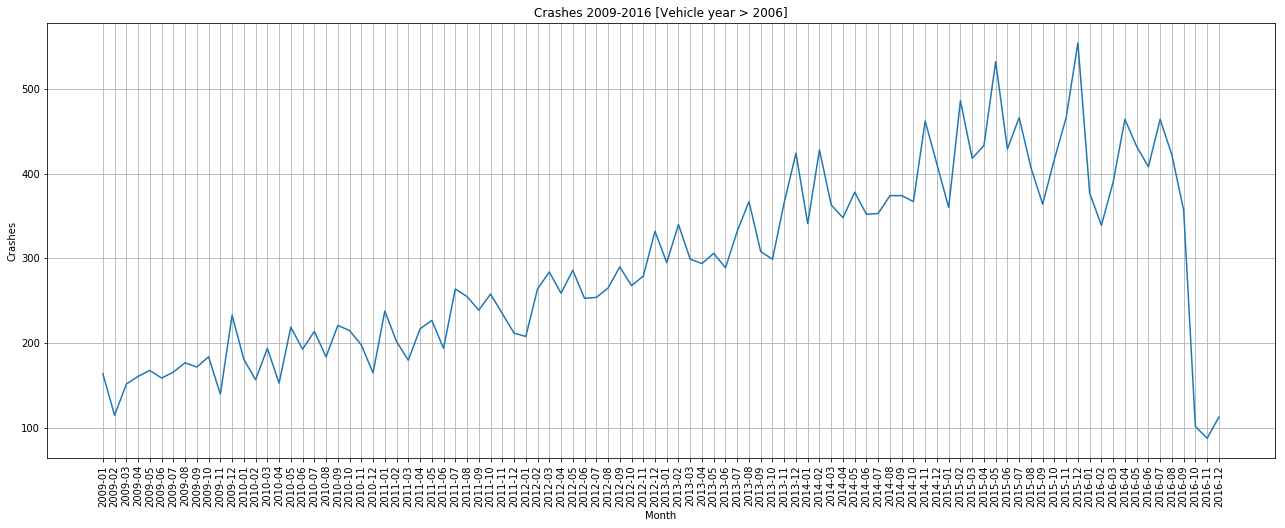

In [79]:
plt.figure(figsize = (22, 8))
plt.plot(fg1.Incidents_number)
plt.xticks(rotation='vertical')
plt.title("Crashes 2009-2016 [Vehicle year > 2006]")
plt.xlabel("Month")
plt.ylabel("Crashes")
plt.xticks
plt.grid()

-*-
Alcohol Involved

In [80]:
df19 = df19.drop_duplicates("Doc_ID", keep=False)
df19 = df19[(df19.Alcohol_Involved == 1)]

In [81]:
fg2 = df19.groupby(["Month_year"]).count()

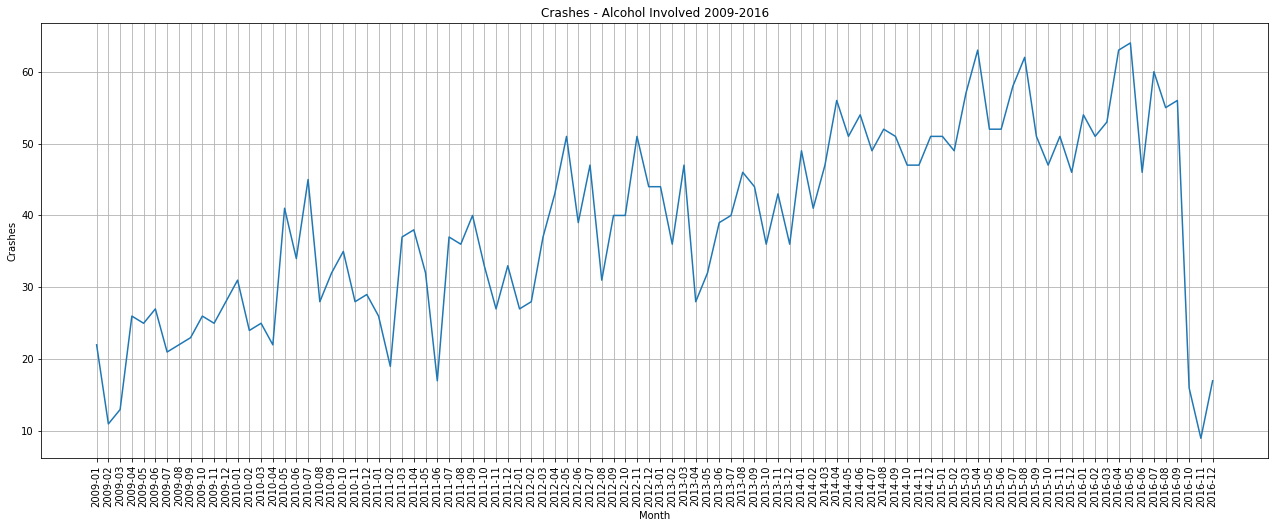

In [82]:
plt.figure(figsize = (22, 8))
plt.plot(fg2.Alcohol_Involved)
plt.xticks(rotation='vertical')
plt.title("Crashes - Alcohol Involved 2009-2016")
plt.xlabel("Month")
plt.ylabel("Crashes")
plt.xticks
plt.grid()

-*-
Drugs Involved

In [83]:
df29 = df29.drop_duplicates("Doc_ID", keep=False)
df29 = df29[(df29.Drugs_Involved == 1)]

In [84]:
fg3 = df29.groupby(["Month_year"]).count()

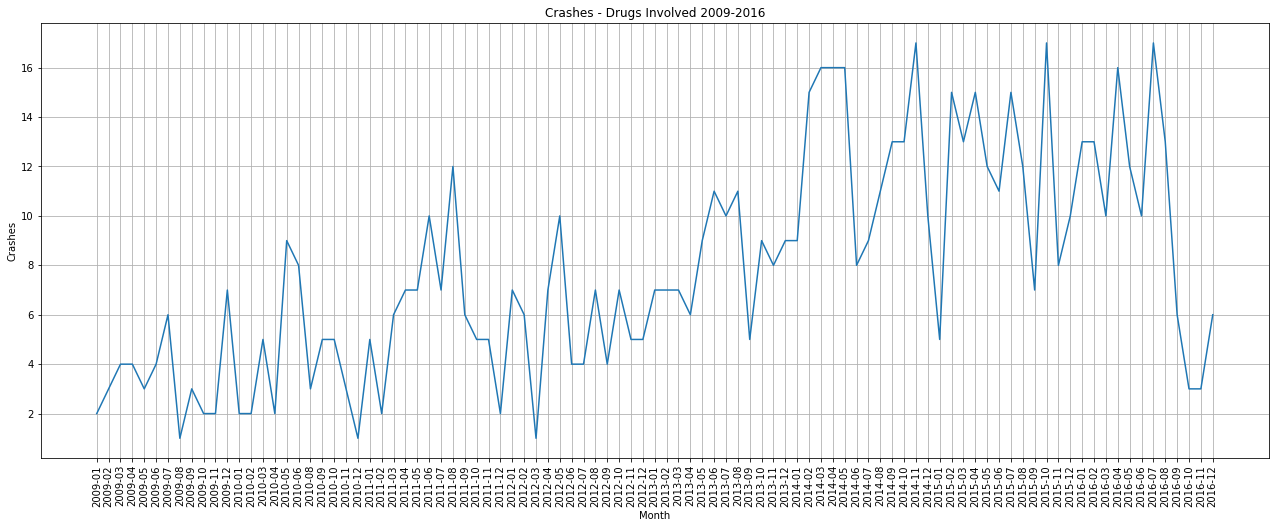

In [85]:
plt.figure(figsize = (22, 8))
plt.plot(fg3.Drugs_Involved)
plt.xticks(rotation='vertical')
plt.title("Crashes - Drugs Involved 2009-2016")
plt.xlabel("Month")
plt.ylabel("Crashes")
plt.xticks
plt.grid()

-*-
Phone Present


In [87]:
df39 = df39.drop_duplicates("Doc_ID", keep=False)
df39 = df39[(df39.Phone_Present == 1)]

In [88]:
fg4 = df39.groupby(["Month_year"]).count()

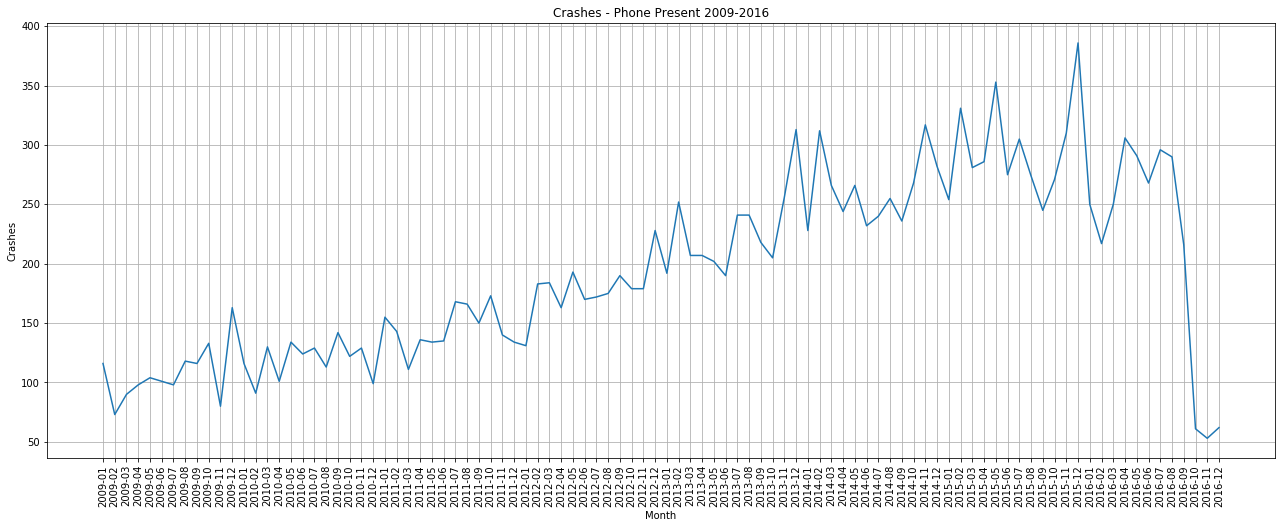

In [89]:
plt.figure(figsize = (22, 8))
plt.plot(fg4.Phone_Present)
plt.xticks(rotation='vertical')
plt.title("Crashes - Phone Present 2009-2016")
plt.xlabel("Month")
plt.ylabel("Crashes")
plt.xticks
plt.grid()